In [197]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import os 
import sys 
import pickle
root_path = os.path.realpath('../')
sys.path.append(root_path)

from utils.parser import parse_alldata
from utils.analysis import print_testacc, print_ttest_acc, compute_choicemats, fit_sigmoids_to_choices, gen_choicemodelrdms, stats_fit_choicerdms,fit_model_to_subjects
from utils.plotting import disp_accuracy, disp_lcurves, disp_sigmoid_fits, disp_param_estimates, disp_choicemats, disp_rsa_param_estimates, disp_model_estimates, disp_lcurves_test


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [201]:
# set a few parameters 
%matplotlib qt
working_dir = os.getcwd()
data_dir = working_dir + "/../data/animals_vehicles_2_transfer/"

domains = ['animals','vehicles']
curricula = ['blocked','interleaved']



# Data Import

In [199]:
# parse data 
try:
    with open(data_dir+"parsed/"+"animals_vehicles_transfer.pkl","rb") as f:
        alldata = pickle.load(f)
except FileNotFoundError:
    alldata = parse_alldata(data_dir+"raw/",transfertask=True, arenatask=True)
    from utils.parser import boundary_to_nan
    alldata = boundary_to_nan(alldata)
    with open(data_dir+"parsed/"+"animals_vehicles_transfer.pkl","wb") as f:
        pickle.dump(alldata,f)
    


parsed 0/198 files
parsed 19/198 files
parsed 20/198 files
parsed 39/198 files
parsed 40/198 files
parsed 59/198 files
parsed 60/198 files
parsed 79/198 files
parsed 80/198 files
parsed 99/198 files
parsed 118/198 files
parsed 119/198 files
parsed 138/198 files
parsed 139/198 files
parsed 158/198 files
parsed 159/198 files
parsed 178/198 files
parsed 179/198 files


# Analysis

## Accuracy

### accuracy differences between groups at test

In [220]:

print_testacc(alldata,onlygood=True, whichtask="base")
print_ttest_acc(alldata, onlygood=True, whichtask="base")
print('\n')
print_testacc(alldata,onlygood=True, whichtask="transfer")
print_ttest_acc(alldata, onlygood=True, whichtask="transfer")

** Accuracy on base task **
only good subjects (n=49): animals, blocked: 0.77
only good subjects (n=50): animals, interleaved: 0.79
only good subjects (n=49): vehicles, blocked: 0.79
only good subjects (n=48): vehicles, interleaved: 0.81
** mann whitney u on base task **
only good subjects: animals, blocked vs interleaved: p= 0.451
only good subjects: vehicles, blocked vs interleaved: p= 0.726


** Accuracy on transfer task **
only good subjects (n=49): animals, blocked: 0.56
only good subjects (n=50): animals, interleaved: 0.53
only good subjects (n=49): vehicles, blocked: 0.63
only good subjects (n=48): vehicles, interleaved: 0.58
** mann whitney u on transfer task **
only good subjects: animals, blocked vs interleaved: p= 0.175
only good subjects: vehicles, blocked vs interleaved: p= 0.045


In [202]:
# plot test accuracy
disp_accuracy(alldata,'animals',whichtask="base")
disp_accuracy(alldata,'vehicles',whichtask="base")
        
disp_accuracy(alldata,'animals',whichtask="transfer")
disp_accuracy(alldata,'vehicles',whichtask="transfer")


In [203]:
# learning curves
disp_lcurves(alldata,onlygood=True)

In [204]:
disp_lcurves_test(alldata,onlygood=True, whichtask="base")

In [205]:
disp_lcurves_test(alldata,onlygood=True, whichtask="transfer")

## Choice Patterns

In [206]:
choicemats = compute_choicemats(alldata, whichtask="base")

### display sigmoids for rel and irrel dimensions 

In [209]:
choicemats = compute_choicemats(alldata, whichtask="base")
betas = fit_sigmoids_to_choices(choicemats,onlygood=True, fitlapse=False)
disp_sigmoid_fits(choicemats,betas, onlygood=True)
# stats on estimated slopes
disp_param_estimates(betas,onlygood=True)

In [210]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
betas = fit_sigmoids_to_choices(choicemats,onlygood=True, fitlapse=False)
disp_sigmoid_fits(choicemats,betas, onlygood=True)
# stats on estimated slopes
disp_param_estimates(betas,onlygood=True)

### display full choice matrices

In [211]:
choicemats = compute_choicemats(alldata, whichtask="base")
disp_choicemats(choicemats,onlygood=True,whichtask="base")

In [212]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
disp_choicemats(choicemats,onlygood=True,whichtask="transfer")

## Choice Pattern RSA


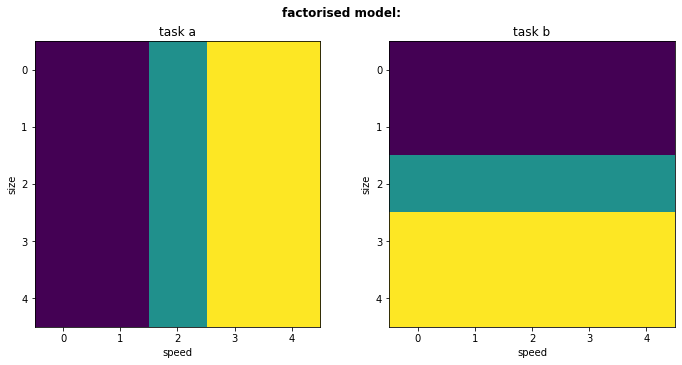

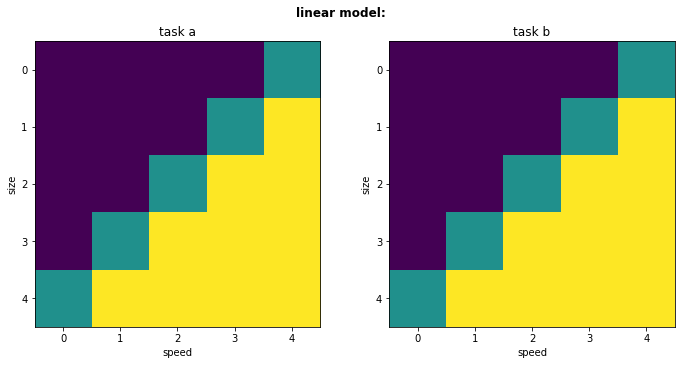

In [140]:
_ = gen_choicemodelrdms(monitor=True)

In [215]:
choicemats = compute_choicemats(alldata, whichtask="base")
betas = stats_fit_choicerdms(choicemats,onlygood=True)
disp_rsa_param_estimates(betas,onlygood=True)

In [216]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
betas = stats_fit_choicerdms(choicemats,onlygood=True)
disp_rsa_param_estimates(betas,onlygood=True)

animals blocked 15
animals blocked 22
vehicles blocked 1
vehicles blocked 45


## Choice Model


In [217]:
choicemats = compute_choicemats(alldata, whichtask="base")
thetas = fit_model_to_subjects(choicemats,onlygood=True)

In [218]:
# stats on estimated slopes
disp_model_estimates(thetas)

In [219]:
choicemats = compute_choicemats(alldata, whichtask="transfer")
thetas = fit_model_to_subjects(choicemats,onlygood=True)
# stats on estimated slopes
disp_model_estimates(thetas)